## Simple Forecasting Methods

- **Average Method**, which uses the mean of all historical closing prices as the forecast.
- **Naive Method**, which uses the last observed closing price as the forecast for all future periods.
- **Seasonal Naive Method**, which uses the closing price from the same day in the previous year as the forecast.


In [2]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Download stock data
ticker = "AAPL"  # Apple Inc. as an example
end_date = datetime.now()
start_date = end_date - timedelta(days=365*5)  # 5 years of data
data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [3]:
# Display the first few rows of the data
print(data.head())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-08-05  49.497501  49.662498  48.145000  48.334999  46.647976  209572000
2019-08-06  49.077499  49.517502  48.509998  49.250000  47.531048  143299200
2019-08-07  48.852501  49.889999  48.455002  49.759998  48.023232  133457600
2019-08-08  50.049999  50.882500  49.847500  50.857498  49.082424  108038000
2019-08-09  50.325001  50.689999  49.822498  50.247501  48.677975   98478800


## Average Method

- **Description:** The average forecasting method calculates the mean of historical data and uses this value as the forecast for all future periods. It assumes that the fluctuations around the historical average will average out, particularly reliable when the data exhibits minimal variability and no discernible trends or seasonal patterns.

- **Use Case:** Ideal for businesses with stable demand or metrics where long-term averages provide a sufficient forecast basis, like utility consumption in stable demographic areas.

In [4]:
# 1. Average Method
def average_forecast(data, periods=10):
    avg = data['Close'].mean()
    forecast = [avg] * periods
    return forecast

avg_forecast = average_forecast(data)
print(f"\nAverage Forecast (next 10 days): {avg_forecast[0]:.2f}")


Average Forecast (next 10 days): 139.86


## Naive Method

-  **Description:** Uses the last observed value as the forecast for all future periods. It is straightforward and reflects the most recent outcome into the future without adjusting for trends or seasonality, often effective when recent data points are the best predictors.

-  **Use Case:** Useful for products or services where change is minimal and the most recent data points are the best predictors, such as predicting the next day's demand based on the most recent day's data in stable environments.

In [5]:
def naive_forecast(data, periods=10):
    last_value = data['Close'].iloc[-1]
    forecast = [last_value] * periods
    return forecast

naive_fcast = naive_forecast(data)
print(f"\nNaive Forecast (next 10 days): {naive_fcast[0]:.2f}")


Naive Forecast (next 10 days): 222.08


## Seasonal Naive Method

-  **Description:** Extends the naive approach by assuming that the seasonal pattern will continue, using the last observed value from the same season to forecast the future. It assumes seasonal patterns repeat regularly over time.

-  **Use Case:** Effective for seasonal businesses or products, such as forecasting holiday sales based on the previous years' data, allowing for better stock and staff management.

In [6]:
def seasonal_naive_forecast(data, seasonal_period=252, periods=10):  # 252 trading days in a year
    seasonal_data = data['Close'].iloc[-seasonal_period:]
    forecast = seasonal_data.iloc[:periods].values
    return forecast

seasonal_naive_fcast = seasonal_naive_forecast(data)
print(f"\nSeasonal Naive Forecast (next 10 days):")
for i, value in enumerate(seasonal_naive_fcast):
    print(f"Day {i+1}: {value:.2f}")


Seasonal Naive Forecast (next 10 days):
Day 1: 195.61
Day 2: 192.58
Day 3: 191.17
Day 4: 181.99
Day 5: 178.85
Day 6: 179.80
Day 7: 178.19
Day 8: 177.97
Day 9: 177.79
Day 10: 179.46


## Plotting the Forecast Models with the Actual Data

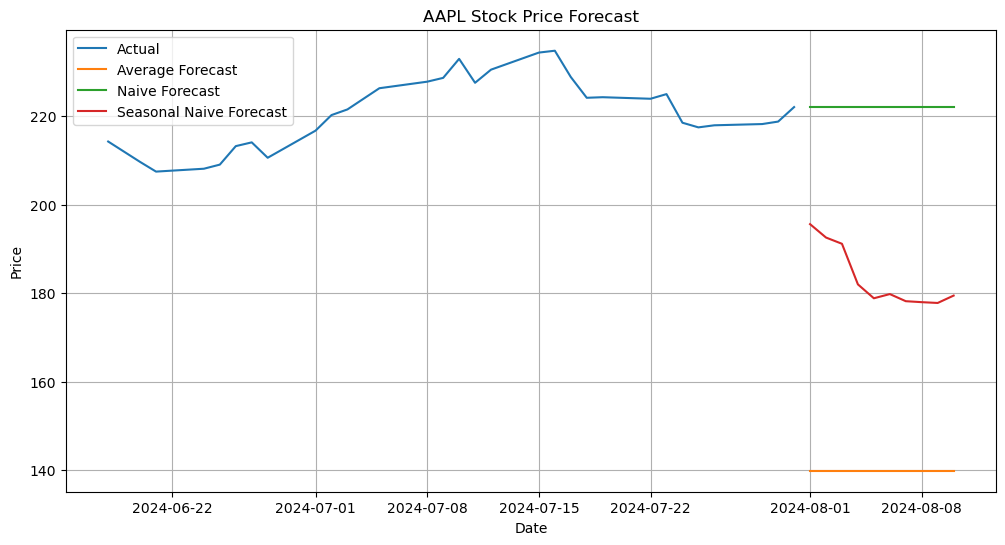

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[-30:], data['Close'].iloc[-30:], label='Actual')
plt.plot(pd.date_range(start=data.index[-1], periods=11, freq='D')[1:], avg_forecast[:10], label='Average Forecast')
plt.plot(pd.date_range(start=data.index[-1], periods=11, freq='D')[1:], naive_fcast[:10], label='Naive Forecast')
plt.plot(pd.date_range(start=data.index[-1], periods=11, freq='D')[1:], seasonal_naive_fcast[:10], label='Seasonal Naive Forecast')
plt.title(f'{ticker} Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()